<h1 align=center> Proceso de ETL</h1>

In [ ]:
# Instalacion de librerias de ser necesario
%pip install -r requirements.txt

In [1]:
# Importacion de librerias 
import pandas as pd
import seaborn as sns


<h2 align=Center> Extraccion de datos</h2>

In [2]:
# Ubicaciones de los archivos 
Ruta_data_hechos = 'Database/homicidios.xlsx - HECHOS.csv'
Ruta_data_victimas = 'Database/homicidios.xlsx - VICTIMAS.csv'

In [3]:
# Lectura del la base de datos de homicidios y primer chequeo
hechos_database = pd.read_csv(Ruta_data_hechos)
hechos_database.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [4]:
# Observacion de informacion del df para tener en cuenta los nombres de las columnas
hechos_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [5]:
# Renombramiento de las columnas
hechos_database.rename(columns={'ID':'Id', 'N_VICTIMAS': 'Num_Victimas', 'FECHA':'Fecha', 'AAAA':'Año', 'MM':'Mes', 'DD':'Dia', 'HORA':'Horas', 
                                  'HH':'Hora','LUGAR_DEL_HECHO':'Lugar_del_hecho', 'TIPO_DE_CALLE':'Tipo_calle','Dirección Normalizada':'Direccion',
                                  'COMUNA':'Comuna','XY (CABA)': 'Coordenadas','PARTICIPANTES':'Participantes',
                                  'VICTIMA':'Victima', 'ACUSADO':'Acusado'}, inplace = True)

<h2> Conteo de nulos </h2>

In [6]:
# Presencia de nulos en cada columna
hechos_database.isna().any()


Id                 False
Num_Victimas       False
Fecha              False
Año                False
Mes                False
Dia                False
Horas              False
Hora               False
Lugar_del_hecho    False
Tipo_calle         False
Calle               True
Altura              True
Cruce               True
Direccion           True
Comuna             False
Coordenadas        False
pos x              False
pos y              False
Participantes      False
Victima            False
Acusado            False
dtype: bool

In [7]:
# Conteo de nulos en cada columna
hechos_database.isna().sum()

Id                   0
Num_Victimas         0
Fecha                0
Año                  0
Mes                  0
Dia                  0
Horas                0
Hora                 0
Lugar_del_hecho      0
Tipo_calle           0
Calle                1
Altura             567
Cruce              171
Direccion            8
Comuna               0
Coordenadas          0
pos x                0
pos y                0
Participantes        0
Victima              0
Acusado              0
dtype: int64

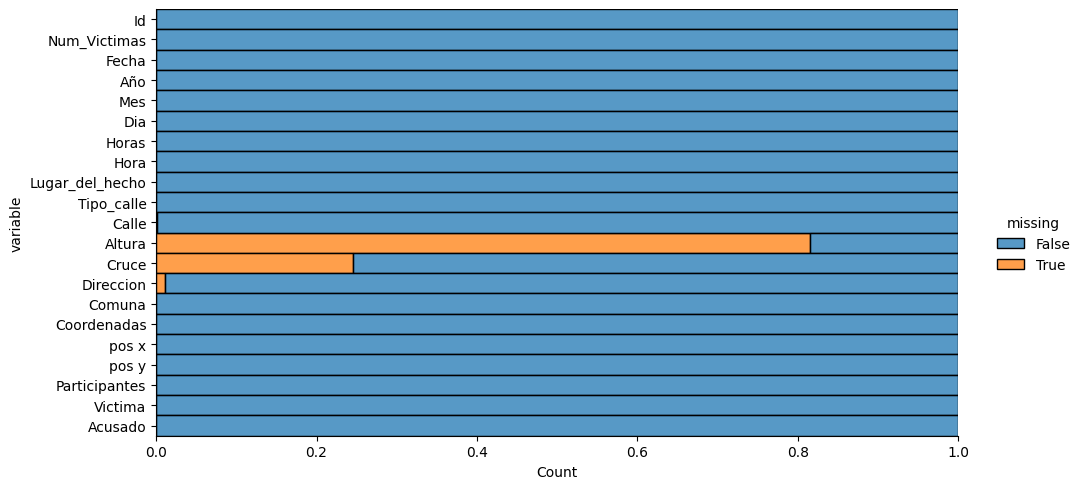

In [8]:
# Proporcion de valores por variable data de items
(
    hechos_database
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

<Axes: >

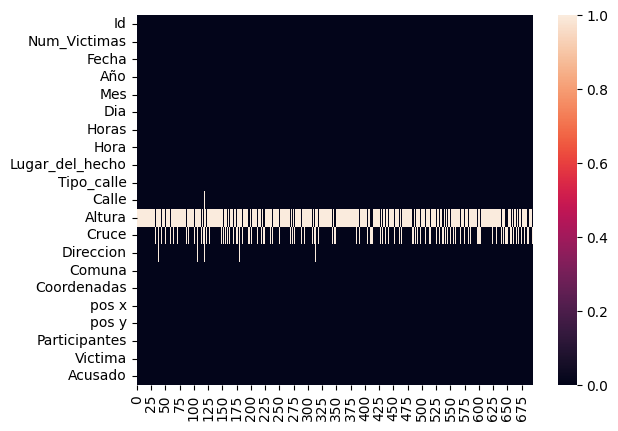

In [9]:
# Visualizacion de los valores nulos / visualization of missing values
(
    hechos_database
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

In [10]:
# Chequeo a columnas 'Tipo_calle' en busca de elementos mal nombrados
hechos_database['Tipo_calle'].unique()

array(['AVENIDA', 'GRAL PAZ', 'CALLE', 'AUTOPISTA'], dtype=object)

In [11]:
# Chequeo a columnas 'Hora' en busca de elementos mal nombrados
hechos_database['Hora'].unique()

array(['4', '1', '7', '0', '5', '18', '19', '15', '11', '22', '16', '9',
       '23', '6', '10', '17', '12', '8', '20', '21', '14', '3', '2', '13',
       'SD'], dtype=object)

In [12]:
# Chequeo a columnas 'Victima' en busca de elementos mal nombrados
hechos_database['Victima'].value_counts()

Victima
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [13]:
# Chequeo a columnas 'Acusado' en busca de elementos mal nombrados
hechos_database['Acusado'].value_counts()

Acusado
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [14]:
# Renombre de todos los elementos 'GRAL PAZ' por 'AVENIDA' 
hechos_database['Tipo_calle'] = hechos_database['Tipo_calle'].replace({'GRAL PAZ':'AVENIDA'})

# Renombre de elemento 'PEATON_MOTO' por 'PEATON'
hechos_database['Victima'] = hechos_database['Victima'].replace({'PEATON_MOTO': 'PEATON'})

In [15]:
# Transformacion de los elemento de la columnas 'Hora' a tipo Int64 
hechos_database['Hora'] = pd.to_numeric(hechos_database ['Hora'], errors="coerce")
hechos_database['Hora'] = hechos_database['Hora'].astype('Int64')

In [16]:
# Eliminacion de columna "Altura"
hechos_database = hechos_database.drop({"Altura",'Cruce'}, axis=1)
hechos_database.columns

Index(['Id', 'Num_Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Horas', 'Hora',
       'Lugar_del_hecho', 'Tipo_calle', 'Calle', 'Direccion', 'Comuna',
       'Coordenadas', 'pos x', 'pos y', 'Participantes', 'Victima', 'Acusado'],
      dtype='object')

In [17]:
hechos_database.isna().sum()

Id                 0
Num_Victimas       0
Fecha              0
Año                0
Mes                0
Dia                0
Horas              0
Hora               1
Lugar_del_hecho    0
Tipo_calle         0
Calle              1
Direccion          8
Comuna             0
Coordenadas        0
pos x              0
pos y              0
Participantes      0
Victima            0
Acusado            0
dtype: int64

In [18]:
# Renombre de elemento 'PEATON_MOTO' por 'PEATON'
hechos_database['Calle'] = hechos_database['Calle'].replace({None: 'SD'})

In [19]:
hechos_database

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Horas,Hora,Lugar_del_hecho,Tipo_calle,Calle,Direccion,Comuna,Coordenadas,pos x,pos y,Participantes,Victima,Acusado
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,12/13/2021,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,12/20/2021,2021,12,20,1:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.","DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,12/30/2021,2021,12,30,0:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,12/15/2021,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.","PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [20]:
target_row = hechos_database.loc[hechos_database['pos x'] == '.']
target_row

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Horas,Hora,Lugar_del_hecho,Tipo_calle,Calle,Direccion,Comuna,Coordenadas,pos x,pos y,Participantes,Victima,Acusado
38,2016-0052,1,4/20/2016,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,10/25/2016,2016,10,25,0:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,11/18/2016,2016,11,18,20:35:00,20,SD,CALLE,SD,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,12/27/2016,2016,12,27,0:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,4/10/2017,2017,4,10,9:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,AVENIDA,"LUGONES, LEOPOLDO AV.","LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,4/28/2017,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,5/1/2017,2017,5,1,3:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,11/19/2017,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,4/21/2018,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,5/17/2020,2020,5,17,6:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


<h2>Victimas</h2>

In [21]:
victimas_database = pd.read_csv(Ruta_data_victimas)

In [22]:
victimas_database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_hecho             717 non-null    object
 1   FECHA                717 non-null    object
 2   AAAA                 717 non-null    int64 
 3   MM                   717 non-null    int64 
 4   DD                   717 non-null    int64 
 5   ROL                  717 non-null    object
 6   VICTIMA              717 non-null    object
 7   SEXO                 717 non-null    object
 8   EDAD                 717 non-null    object
 9   FECHA_FALLECIMIENTO  717 non-null    object
dtypes: int64(3), object(7)
memory usage: 56.1+ KB


In [23]:
# Renombramiento de las columnas
victimas_database.rename(columns={'ID_hecho':'Id','FECHA':'Fecha', 'AAAA':'Año', 'MM':'Mes', 'DD':'Dia', 'ROL':'Rol',
                                  'VICTIMA':'Victima', 'SEXO':'Sexo','EDAD':'Edad','FECHA_FALLECIMIENTO':'Fecha_fallecimiento'}, inplace = True)
victimas_database.head(2)

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_fallecimiento
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016


In [24]:
victimas_database = victimas_database.drop({'Fecha','Año','Mes','Dia','Victima','Fecha_fallecimiento'}, axis = 1)
victimas_database.head(2)

,Id,Rol,Sexo,Edad
0,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,CONDUCTOR,MASCULINO,70


In [25]:
# Presencia de nulos en cada columna
victimas_database.isna().any()

Id      False
Rol     False
Sexo    False
Edad    False
dtype: bool

In [26]:
victimas_database.isnull().sum()

Id      0
Rol     0
Sexo    0
Edad    0
dtype: int64

In [27]:
victimas_database

,Id,Rol,Sexo,Edad
0,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,CONDUCTOR,MASCULINO,70
2,2016-0003,CONDUCTOR,MASCULINO,30
3,2016-0004,CONDUCTOR,MASCULINO,18
4,2016-0005,CONDUCTOR,MASCULINO,29
...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43
715,2021-0095,CONDUCTOR,MASCULINO,27


<h2> Merge</h2>

In [28]:
data_siniestros = hechos_database.merge(victimas_database,on='Id',how='left')
data_siniestros.head(4)

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Horas,Hora,Lugar_del_hecho,Tipo_calle,...,Comuna,Coordenadas,pos x,pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,...,9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18


In [29]:
data_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               717 non-null    object
 1   Num_Victimas     717 non-null    int64 
 2   Fecha            717 non-null    object
 3   Año              717 non-null    int64 
 4   Mes              717 non-null    int64 
 5   Dia              717 non-null    int64 
 6   Horas            717 non-null    object
 7   Hora             716 non-null    Int64 
 8   Lugar_del_hecho  717 non-null    object
 9   Tipo_calle       717 non-null    object
 10  Calle            717 non-null    object
 11  Direccion        708 non-null    object
 12  Comuna           717 non-null    int64 
 13  Coordenadas      717 non-null    object
 14  pos x            717 non-null    object
 15  pos y            717 non-null    object
 16  Participantes    717 non-null    object
 17  Victima          717 non-null    ob

In [30]:
data_siniestros.isna().sum()

Id                 0
Num_Victimas       0
Fecha              0
Año                0
Mes                0
Dia                0
Horas              0
Hora               1
Lugar_del_hecho    0
Tipo_calle         0
Calle              0
Direccion          9
Comuna             0
Coordenadas        0
pos x              0
pos y              0
Participantes      0
Victima            0
Acusado            0
Rol                0
Sexo               0
Edad               0
dtype: int64

In [31]:
data_siniestros['Direccion'] = data_siniestros['Direccion'].replace({None: 'SD'})

In [32]:
data_siniestros.columns

Index(['Id', 'Num_Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Horas', 'Hora',
       'Lugar_del_hecho', 'Tipo_calle', 'Calle', 'Direccion', 'Comuna',
       'Coordenadas', 'pos x', 'pos y', 'Participantes', 'Victima', 'Acusado',
       'Rol', 'Sexo', 'Edad'],
      dtype='object')

In [33]:
data_siniestros ["Edad"].dropna()

0      19
1      70
2      30
3      18
4      29
       ..
712    18
713    43
714    27
715    60
716    53
Name: Edad, Length: 717, dtype: object

In [34]:
data_siniestros['Edad'] = data_siniestros['Edad'].replace({'SD': None})
data_siniestros['pos x'] = data_siniestros['pos x'].replace({'.': 'SD'})
data_siniestros['pos y'] = data_siniestros['pos y'].replace({'.': 'SD'})
data_siniestros['Coordenadas'] = data_siniestros['Coordenadas'].replace({'Point (. .)': 'SD'})

In [35]:
#Cambio la columna edad a numerico y luego a tipo entero
data_siniestros ["Edad"] = pd.to_numeric(data_siniestros["Edad"], errors="coerce")
data_siniestros ["Edad"] = data_siniestros["Edad"].astype("Int64")

In [36]:
# Definir los límites de rango de edad 
bins = [0, 20, 40, 60, 80, float('inf')]  # Ensure all elements are numeric

# Definir etiquetas para cada rango de edad.
labels = ["Menos de 20", "Entre 21 y 40", "Entre 41 y 60", "Entre 61 y 80", "Más de 80"]

# Crear la columna de rango de edad
data_siniestros['Rango_etario'] = pd.cut(data_siniestros['Edad'], bins=bins, labels=labels, right=False)
data_siniestros.head(3)

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Horas,Hora,Lugar_del_hecho,Tipo_calle,...,Coordenadas,pos x,pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad,Rango_etario
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,Menos de 20
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,Entre 61 y 80
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,Entre 21 y 40


In [37]:
def convert_date(date_str):
    try:
        # Intentar con diferentes formatos de orden de fechas
        return pd.to_datetime(date_str, format="%d/%m/%Y")
    except ValueError:
        try:
            return pd.to_datetime(date_str, format="%m/%d/%Y")
        except ValueError:
            # Manejo de forrmatos que no entren en los antes descritos
            return None

data_siniestros['Fecha'] = data_siniestros['Fecha'].apply(convert_date)

In [38]:
# Creacion de la columna `Dia_nombre` con el nombre del día 
data_siniestros["Dia_nombre"] = data_siniestros["Fecha"].dt.strftime("%A")

# Creacion un diccionario para modificar los nombres de los dias de la semana en español
Semana ={ "Monday": "Lunes","Tuesday": "Martes","Wednesday": "Miercoles","Thursday": "Jueves", "Friday":"Viernes",
         "Saturday": "Sabado", "Sunday": "Domingo"}
         
data_siniestros["Dia_nombre"] = data_siniestros["Dia_nombre"].replace(Semana)

In [39]:
data_siniestros

,Id,Num_Victimas,Fecha,Año,Mes,Dia,Horas,Hora,Lugar_del_hecho,Tipo_calle,...,pos x,pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad,Rango_etario,Dia_nombre
0,2016-0001,1,2016-01-01,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19,Menos de 20,Viernes
1,2016-0002,1,2016-02-01,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70,Entre 61 y 80,Lunes
2,2016-0003,1,2016-03-01,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30,Entre 21 y 40,Martes
3,2016-0004,1,2016-10-01,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18,Menos de 20,Sabado
4,2016-0005,1,2016-01-21,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29,Entre 21 y 40,Jueves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,18,Menos de 20,Lunes
713,2021-0094,1,2021-12-20,2021,12,20,1:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO,PASAJERO_ACOMPAÑANTE,FEMENINO,43,Entre 41 y 60,Lunes
714,2021-0095,1,2021-12-30,2021,12,30,0:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS,CONDUCTOR,MASCULINO,27,Entre 21 y 40,Jueves
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS,CONDUCTOR,MASCULINO,60,Entre 61 y 80,Miercoles


In [40]:
# Guardo el DataFrame como archivo CSV en la ruta especificada
data_siniestros.to_csv("Database/Data_siniestros.csv", index=False)